In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os 

import cv2
from PIL import Image

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dung de train mo hinh
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.utils import to_categorical
import time
import datetime



c:\Users\soiba\anaconda3\envs\traffic_sign\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [4]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [5]:
import os
import numpy as np
from PIL import Image

# --- Cài đặt biến ---
classes = 43
# Dùng os.path.join() cho đường dẫn thư mục gốc để đảm bảo tương thích trên mọi HĐH
base_dir = os.path.join('C:', os.sep, 'workspace', 'Project cá nhân', 'Nhận diện biển báo đường', 'Train') 

data = []
labels = []
print("Bắt đầu tải dữ liệu...")

# --- Vòng lặp tải và xử lý ảnh ---
for i in range(classes):
    # 1. Tạo đường dẫn thư mục lớp (ví dụ: .../Train/0, .../Train/1, v.v.)
    class_path = os.path.join(base_dir, str(i))
    
    # Bỏ qua nếu thư mục lớp không tồn tại
    if not os.path.isdir(class_path):
        print(f"Cảnh báo: Không tìm thấy thư mục: {class_path}")
        continue

    images = os.listdir(class_path)

    for image_name in images:
        # 2. Tạo đường dẫn đầy đủ đến file ảnh
        image_full_path = os.path.join(class_path, image_name)
        
        try:
            # Kiểm tra xem có phải file ảnh không (tránh lỗi với các file ẩn như .DS_Store)
            if not image_name.endswith(('.png', '.jpg', '.jpeg', '.ppm')):
                continue

            # Mở ảnh
            image = Image.open(image_full_path)
            
            # Thay đổi kích thước và chuyển sang mảng numpy
            image = image.resize((30, 30))
            image_array = np.array(image)
            
            data.append(image_array)
            labels.append(i)
            
        except Exception as e:
            # 3. In lỗi cụ thể để dễ debug
            print(f"Lỗi khi tải ảnh {image_full_path}: {e}")
            
    # Hiển thị tiến trình tải
    print(f"Đã xử lý xong lớp {i+1}/{classes}")

# --- Chuyển đổi thành numpy arrays ---
data = np.array(data)
labels = np.array(labels)

print("Tải dữ liệu hoàn tất.")
print(f"Tổng số ảnh được tải: {len(data)}")
print(f"Kích thước mảng dữ liệu: {data.shape}")

Bắt đầu tải dữ liệu...
Đã xử lý xong lớp 1/43
Đã xử lý xong lớp 2/43
Đã xử lý xong lớp 3/43
Đã xử lý xong lớp 4/43
Đã xử lý xong lớp 5/43
Đã xử lý xong lớp 6/43
Đã xử lý xong lớp 7/43
Đã xử lý xong lớp 8/43
Đã xử lý xong lớp 9/43
Đã xử lý xong lớp 10/43
Đã xử lý xong lớp 11/43
Đã xử lý xong lớp 12/43
Đã xử lý xong lớp 13/43
Đã xử lý xong lớp 14/43
Đã xử lý xong lớp 15/43
Đã xử lý xong lớp 16/43
Đã xử lý xong lớp 17/43
Đã xử lý xong lớp 18/43
Đã xử lý xong lớp 19/43
Đã xử lý xong lớp 20/43
Đã xử lý xong lớp 21/43
Đã xử lý xong lớp 22/43
Đã xử lý xong lớp 23/43
Đã xử lý xong lớp 24/43
Đã xử lý xong lớp 25/43
Đã xử lý xong lớp 26/43
Đã xử lý xong lớp 27/43
Đã xử lý xong lớp 28/43
Đã xử lý xong lớp 29/43
Đã xử lý xong lớp 30/43
Đã xử lý xong lớp 31/43
Đã xử lý xong lớp 32/43
Đã xử lý xong lớp 33/43
Đã xử lý xong lớp 34/43
Đã xử lý xong lớp 35/43
Đã xử lý xong lớp 36/43
Đã xử lý xong lớp 37/43
Đã xử lý xong lớp 38/43
Đã xử lý xong lớp 39/43
Đã xử lý xong lớp 40/43
Đã xử lý xong lớp 41/43
Đã

In [10]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
from keras.layers import MaxPool2D
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

c:\Users\soiba\anaconda3\envs\traffic_sign\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.6831 - loss: 1.4872 - val_accuracy: 0.9667 - val_loss: 0.1441
Epoch 2/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9523 - loss: 0.1852 - val_accuracy: 0.9686 - val_loss: 0.1296
Epoch 3/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.9708 - loss: 0.1118 - val_accuracy: 0.9885 - val_loss: 0.0628
Epoch 4/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9726 - loss: 0.1051 - val_accuracy: 0.9916 - val_loss: 0.0403
Epoch 5/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.9821 - loss: 0.0698 - val_accuracy: 0.9939 - val_loss: 0.0247
Epoch 6/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.9839 - loss: 0.0596 - val_accuracy: 0.9897 - val_loss: 0.0417
Epoch 7/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 33s 135ms/step - accuracy: 0.9871 - loss: 0.0494 - val_accuracy: 0.9909 - val_loss: 0.0334
Epoch 8/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 39s 157ms/step - accuracy: 0.9863 - loss: 0.0

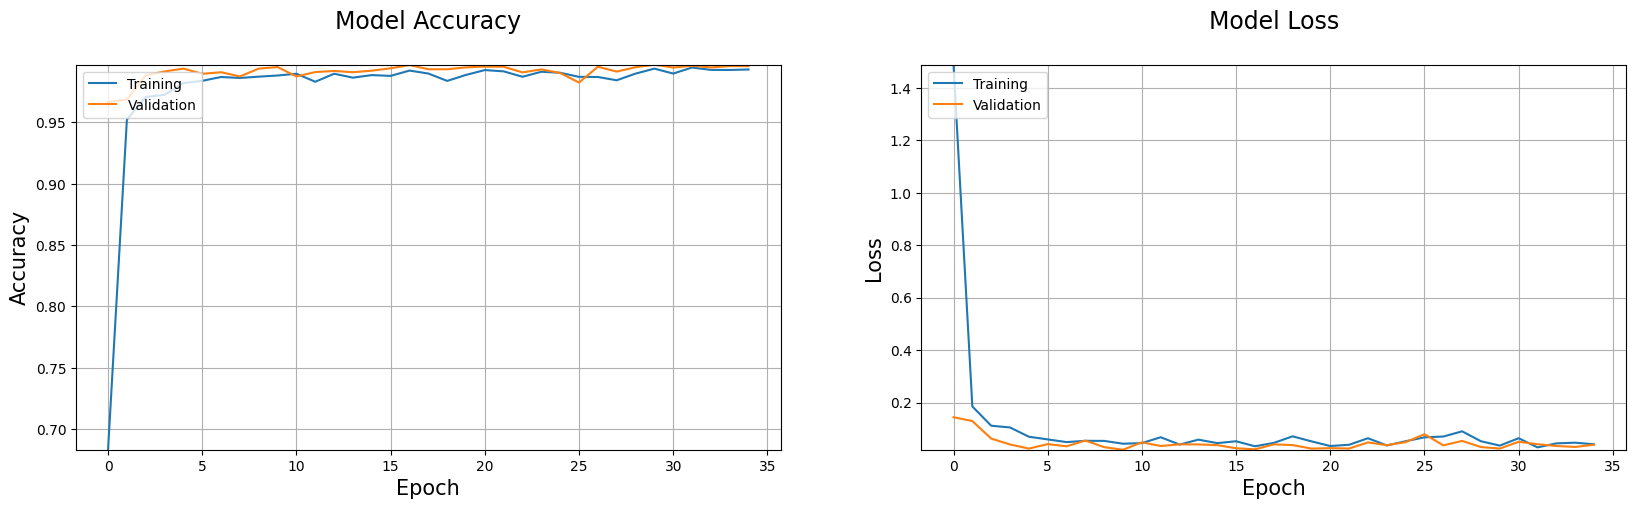

In [19]:
plot_performance(history=history1)

In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
# y_test = pd.read_csv('C:\workspace\Project cá nhân\Nhận diện biển báo đường\Test.csv')
base_path = os.path.join('C:', os.sep, 'workspace', 'Project cá nhân', 'Nhận diện biển báo đường')
y_test = os.path.join(base_path, 'Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('C:\workspace\Project cá nhân\Nhận diện biển báo đường'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 46-47: malformed \N character escape (1628405617.py, line 16)

In [23]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import tensorflow as tf # Cần import TensorFlow để dùng tf.device
from sklearn.metrics import accuracy_score

# --- Định nghĩa Đường dẫn Gốc ---
# Sử dụng os.path.join() để đảm bảo tính tương thích giữa các HĐH
base_path = os.path.join('C:', os.sep, 'workspace', 'Project cá nhân', 'Nhận diện biển báo đường')
test_csv_path = os.path.join(base_path, 'Test.csv')


# --- Importing the test dataset ---
try:
    y_test = pd.read_csv(test_csv_path)
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file CSV tại {test_csv_path}. Vui lòng kiểm tra lại đường dẫn.")
    exit()

labels = y_test["ClassId"].values
imgs = y_test["Path"].values # Ví dụ: ['/Test/00000.png', 'Test/00001.png', ...]

data = []

# --- Retrieving the images ---
# Giữ khối tf.device nếu bạn muốn sử dụng GPU, nếu không, hãy bỏ nó đi
with tf.device('/GPU:0'):
    for img_relative_path in imgs:
        
        # ⚠️ Sửa lỗi nối đường dẫn file
        # imgs[i] chứa đường dẫn tương đối (ví dụ: 'Test/00000.png')
        # Dùng os.path.join() là cách đúng để nối đường dẫn gốc và đường dẫn tương đối
        image_full_path = os.path.join(base_path, img_relative_path)
        
        try:
            image = Image.open(image_full_path)
            image = image.resize((30, 30))
            data.append(np.array(image))
        except FileNotFoundError:
            print(f"LỖI: Không tìm thấy ảnh tại {image_full_path}")
        except Exception as e:
            print(f"LỖi khác khi tải ảnh {image_full_path}: {e}")

# Converting lists into numpy arrays
X_test = np.array(data)
y_test_labels = labels # Đổi tên biến y_test thành y_test_labels để tránh nhầm lẫn

print(f"Tải xong {X_test.shape[0]} ảnh test.")
print(f"Kích thước X_test: {X_test.shape}")

Tải xong 12630 ảnh test.
Kích thước X_test: (12630, 30, 30, 3)


In [24]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
0.9694378463974663


In [25]:
model.save('traffic_sign_model.h5')